# Project 2 - Machine Learning

Students: Joel Jonassi 19698
        Rui Alves 15505
Teacher: Joaquim Silva

DataSet Link : https://www.kaggle.com/datasets/camnugent/california-housing-prices

# Introduction

For this job we will analyse the California house dataset...

Will start with a contextualization about the metrics that we will use to evaluate the models.

Note: Underfiting if the training error and error testing high
Overfitting if error training is low or accurancy high and error testing low or accurancy high

## Contextualization
At this section will make a contextualization about the metrics used in this project to measure the models performance.

### RandomForest and DecisionTreeClassifier
#### Classification accuracy
The classification accuracy is the ratio of number of correct predictions to the total number of input samples.
This metric works well only if there are equal number of samples belonging to each class.

According to the "https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234", says that if we consider that there are 98% samples of class A and 2% samples of class B in our training set. Then our model can easily get 98% training accuracy by simply predicting every training sample belonging to class A.
When the same model is tested on a test set with 60% samples of class A and 40% samples of class B, then the test accuracy would drop down to 60%. Classification Accuracy is great, but gives us the false sense of achieving high accuracy.
image

#### Confusion Matrix

Confusion Matrix as the name suggests gives us a matrix as output and describes the complete performance of the model.
There are 4 important terms :

* True Positives : The cases in which we predicted YES and the actual output was also YES.
* True Negatives : The cases in which we predicted NO and the actual output was NO.
* False Positives : The cases in which we predicted YES and the actual output was NO.
* False Negatives : The cases in which we predicted NO and the actual output was YES.
Accuracy for the matrix can be calculated by taking average of the values lying across the “main diagonal”.

image

#### F1 Score

F1 Score is used to measure a test’s accuracy

F1 Score is the Harmonic Mean between precision and recall. The range for F1 Score is [0, 1]. It tells you how precise your classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances).

High precision but lower recall, gives you an extremely accurate, but it then misses a large number of instances that are difficult to classify. The greater the F1 Score, the better is the performance of our model. Mathematically, it can be expressed as :


F1 Score tries to find the balance between precision and recall.
image

Precision : It is the number of correct positive results divided by the number of positive results predicted by the classifier.
image
Recall : It is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive).
image


#### Mean Absolute Error
Mean Absolute Error is the average of the difference between the Original Values and the Predicted Values. It gives us the measure of how far the predictions were from the actual output. However, they don’t gives us any idea of the direction of the error i.e. whether we are under predicting the data or over predicting the data. Mathematically, it is represented as :
image

The closer MAE is to 0, the more accurate the model is.

#### Mean Squared Error
Mean Squared Error(MSE) is quite similar to Mean Absolute Error, the only difference being that MSE takes the average of the square of the difference between the original values and the predicted values. The advantage of MSE being that it is easier to compute the gradient, whereas Mean Absolute Error requires complicated linear programming tools to compute the gradient. As, we take square of the error, the effect of larger errors become more pronounced then smaller error, hence the model can now focus more on the larger errors.

### Imports side

In [137]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
#from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder
from apyori import apriori
from sklearn import tree
from kneed import KneeLocator
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import matplotlib.cm as cm


### DataSet reading

In [138]:
df = pd.read_csv("dataset/housingDataPrepare.csv")

## Automatic Classification

Objetives:
 * Try do predict how far the house is from the beach.

### Data preparation

We consider 10 dataset attributes important to train the model to predict how far the house is near form the beach.
From the 10 attributes, we used 9 for testing and 1 for the model to predict the target:
* latitude and longitude - we use this two variables to helps ous finding the location of the houses.
* house_median_age - this attribute helps our model to predict the age of the house.
* total_rooms and total_bedrooms- we find these variables important to train the model because can tells ous how many rooms are near to the beach, as we know there are more houses/rooms for tourism near to the beach.
* population - can have a correlation between population and proximity to the beach.
* house_hold - we assume that the household can have influence of proximity to the beach or not.
* median_income and median_house_value - these two variables we assume that are essential to predict if the house is near the beach, because people with with higher purchasing power are more likely to live there due to the cost of living in these areas.
* ocean_proximity - This is the target attribute, we will use two algorithms to predict the ocean proximity namely Decision Random Forest Algorithm and Tree Classifier.



### Random Forest Algorithm

Confusion Matrix :
[[   0    3    0    0    0]
 [   0  734   13   31    1]
 [   0    9  655    3    1]
 [   0   26    4 2706   31]
 [   0    0    3   29 1943]]
Accuracy Score : 0.9751291989664083
Report : 
              precision    recall  f1-score   support

      ISLAND       0.00      0.00      0.00         3
  NEAR OCEAN       0.95      0.94      0.95       779
    NEAR BAY       0.97      0.98      0.98       668
   <1H OCEAN       0.98      0.98      0.98      2767
      INLAND       0.98      0.98      0.98      1975

    accuracy                           0.98      6192
   macro avg       0.78      0.78      0.78      6192
weighted avg       0.97      0.98      0.97      6192

Mean Absolute Error: 0.03504521963824289


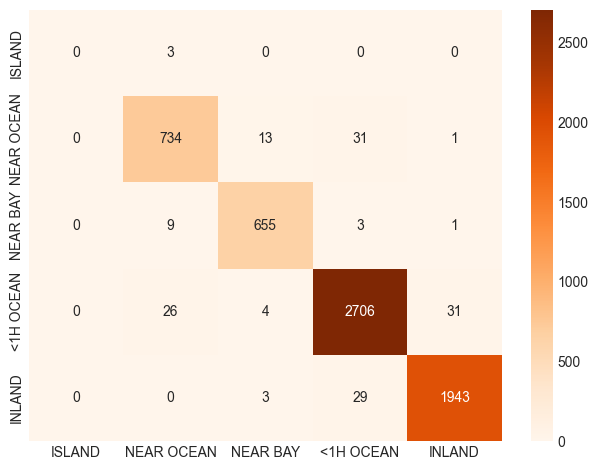

In [133]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean') 
data = df.iloc[: , :-3] # Ignore last 3 columns

X = data.iloc[ :, : -1].values # Use all columns except de last one in "data"

imp.fit(X)
X = imp.transform(X)
Y = data.iloc[ :, 9].values # Target 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

#Using random forest classifier
classifier = RandomForestClassifier() 
classifier = classifier.fit(X_train, Y_train) # model creation
predicted = classifier.predict(X_test) # model evaluation

cols = ['ISLAND', 'NEAR OCEAN', 'NEAR BAY', '<1H OCEAN', 'INLAND']

#Results
print ('Confusion Matrix :')
confm = confusion_matrix(Y_test, predicted, labels=cols)
print(confm)
print('Accuracy Score :', accuracy_score(Y_test, predicted))
print('Report : ')
print(classification_report(Y_test, predicted, labels=cols, zero_division=0))

df_cm = DataFrame(confm, index=cols, columns=cols)
ax = sns.heatmap(df_cm, cmap='Oranges', annot=True, fmt="d")


conv_to_num = {
    'ISLAND': 1,
    'NEAR OCEAN': 2,
    'NEAR BAY': 3,
    '<1H OCEAN': 4,
    'INLAND': 5
}

def convert_num(name):
    return conv_to_num[name]

mae_y_true = list(map(convert_num, Y_test))
mae_y_pred = list(map(convert_num, predicted))
print(f"Mean Absolute Error: {mean_absolute_error(mae_y_true, mae_y_pred)}")

### Decision Tree Classifier

confusion Matrix
[[   3    0    0    0    0]
 [   0  743    8   27    1]
 [   0    9  653    5    1]
 [   0   39    5 2691   32]
 [   0    0    0   29 1946]]
Accuracy Score :  0.9748062015503876
Report: 
              precision    recall  f1-score   support

   <1H OCEAN       0.98      0.97      0.98      2767
      INLAND       0.98      0.99      0.98      1975
      ISLAND       1.00      1.00      1.00         3
    NEAR BAY       0.98      0.98      0.98       668
  NEAR OCEAN       0.94      0.95      0.95       779

    accuracy                           0.97      6192
   macro avg       0.98      0.98      0.98      6192
weighted avg       0.97      0.97      0.97      6192

Mean Absolute Error: 0.036337209302325583


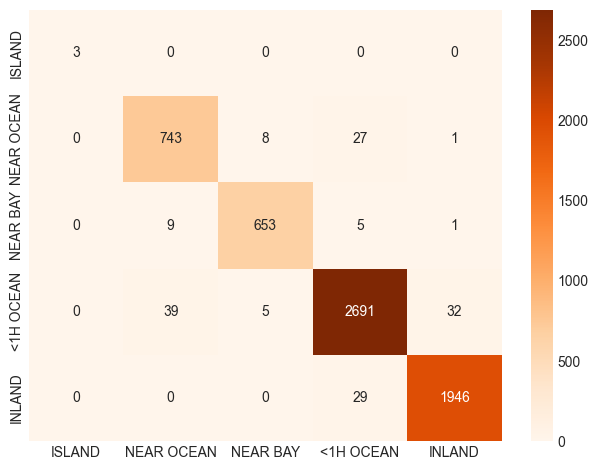

In [134]:
DTC = DecisionTreeClassifier().fit(X_train, Y_train) # model creation
predicted = DTC.predict(X_test) # model evaluation
print('confusion Matrix')
confm = confusion_matrix(Y_test, predicted, labels=cols)
print(confm)
print('Accuracy Score : ', accuracy_score(Y_test, predicted))
print("Report: ")
print(classification_report(Y_test, predicted))

mae_y_true = list(map(convert_num, Y_test))
mae_y_pred = list(map(convert_num, predicted))
print(f"Mean Absolute Error: {mean_absolute_error(mae_y_true, mae_y_pred)}")

df_cm = DataFrame(confm, index=cols, columns=cols)
ax = sns.heatmap(df_cm, cmap='Oranges', annot=True, fmt="d")

In [ ]:
feature_names = ["longitude"	,"latitude","housing_median_age"	,"total_rooms"	,"total_bedrooms"	,"population",	"households",	"median_income"	,"median_house_value"]
target_names = "ocean_proximity"
plt.figure(figsize=(60,60))
tree.plot_tree(DTC, filled=True, feature_names=feature_names, class_names=target_names,fontsize=6)


## Results Analysis
At this section we will discuss a classification Accuracy of RandomForest and DecisionTreeClassifier Algorithms. 

### Analysis
As we can see in confusion matrix of these two algorithms we observe that the ISLAND in the RandomForest algorithm isn't classified correctly although in DecisionTreeClassifier algorithm it was, even so this algorithm has a worst accuracy score than the RandomForest algorithm.

Observing the Mean Absolute Error we can conclude how far we are from classifying everything correctly.

RandomForest Confusion Matrix

![Result](img/RandomForestConfM.png)


Accuracy Score : 0.9751291989664083

Mean Absolute Error: 0.03504521963824289


DecisionTree Confusion Matrix

![Result](img/DecisionTreeConfM.png)

Accuracy Score :  0.9748062015503876

Mean Absolute Error: 0.036337209302325583

## Cluster with K-Means

Objetives:
 * Classify the zones where the people with the highest purchasing power reside. 

### Data prepare

For the algorithm K-Means we just use 3 attributes namely:
median_house_value - helps us to 
latitude and longitude - To find where the purchasing power people live.


In [152]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

X = df.loc[:, ["median_house_value", "latitude", "longitude"]]
X.head()



C:\Users\Asus\AppData\Local\Temp\ipykernel_13096\3040802256.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


,median_house_value,latitude,longitude
0,452600,37.88,-122.23
1,358500,37.86,-122.22
2,352100,37.85,-122.24
3,341300,37.85,-122.25
4,342200,37.85,-122.25


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus

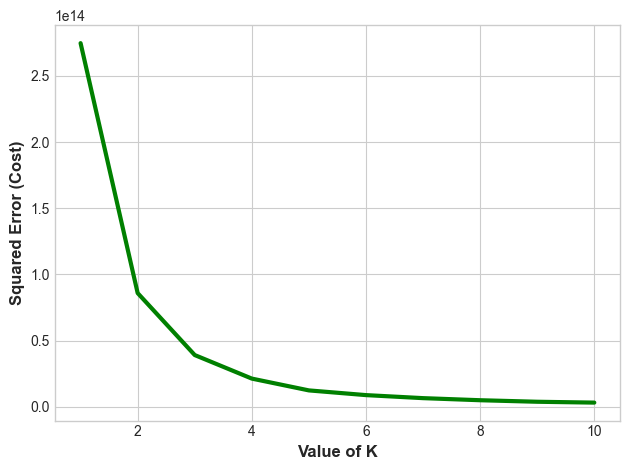

In [153]:
#Elbow
cost =[]
for i in range(1, 11):
    KM = KMeans(n_clusters = i, max_iter = 100)
    KM.fit(X)
     
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)    
 
# plot the cost against K values
plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot

kl = KneeLocator(range(1, 11), cost, curve="convex", direction="decreasing" )
print(f"The optimal K is {kl.elbow}")

In [164]:
# Create cluster feature
kmeans = KMeans(n_clusters=3)

X["Cluster"] = kmeans.fit_predict(X)

X["Cluster"] = X["Cluster"].astype("category")

X.head()


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,median_house_value,latitude,longitude,Cluster,median_income
0,452600,37.88,-122.23,2,8.3252
1,358500,37.86,-122.22,2,8.3014
2,352100,37.85,-122.24,2,7.2574
3,341300,37.85,-122.25,2,5.6431
4,342200,37.85,-122.25,2,3.8462


A scatter plot that shows the geographic distribution of the clusters. It seems like the algorithm has created separate segments for higher-income areas.

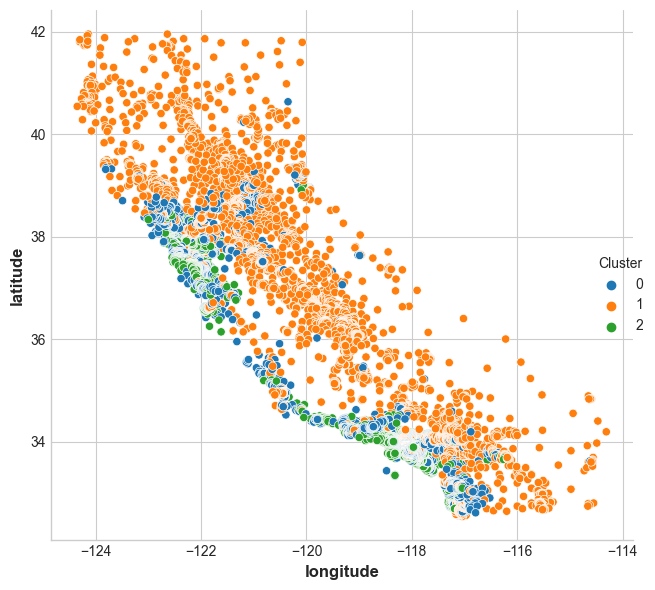

In [166]:
%matplotlib widget

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x  = X["latitude"]
y  = X["longitude"]
z  = X["median_house_value"]
ax.set_xlabel("latitude")
ax.set_ylabel("longitude")
ax.set_zlabel("median_house_value")
ax.scatter(x, y, z)
plt.show()

#2d
#sns.relplot(x="longitude", y="latitude", hue="Cluster", data=X, height=6,);

sns.relplot(
    x="longitude", y="latitude", hue="Cluster", data=X, height=6,
)

The target in this dataset is median_house_value (median house value). These box-plots show the distribution of the target within each cluster.

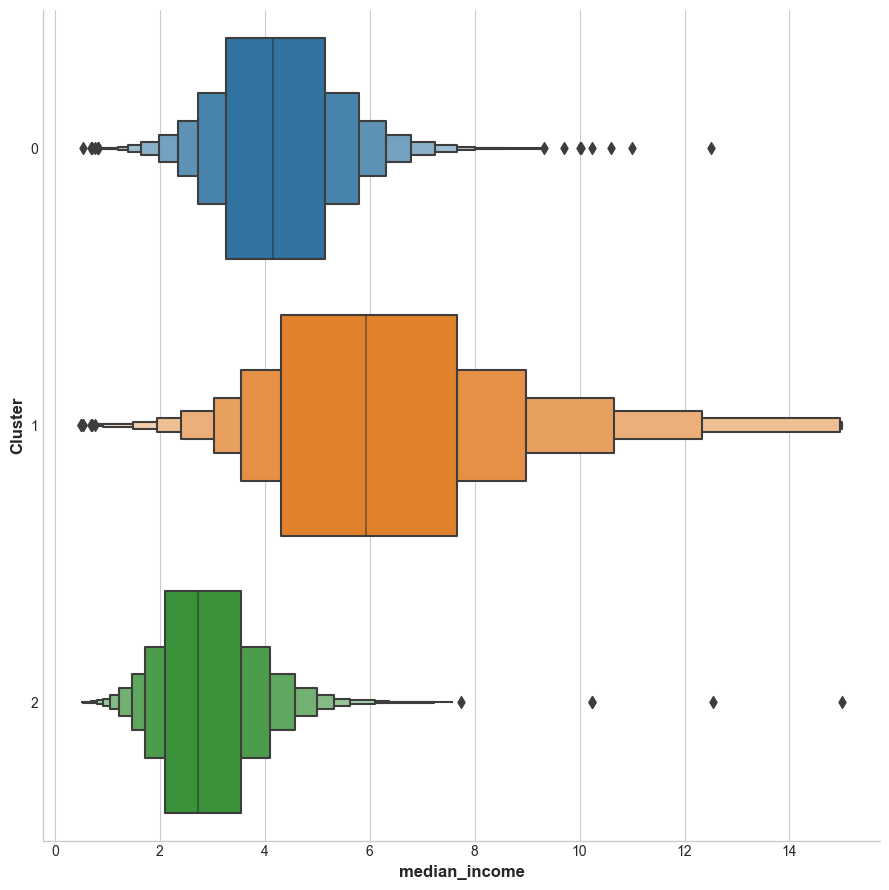

In [156]:
X["median_income"] = df["median_income"]
sns.catplot(x="median_income", y="Cluster", data=X, kind="boxen", height=9)

X["median_income"] = df["median_income"]
sns.catplot(x="median_income", y="Cluster", data=X, kind="boxen", height=9)## Results Analysis
At this section we will discuss the performance of the K-Means algorithm.

## Association rules

Objetives:
* Knowing whether or not you are close to the beach, determine the price of the house.

### Data Prepare
Add numerical column for ocean proximity
=SE(H2<=2,"Very Low Income",SE(E(2<H2,H2<=4),"Low Income",SE(E(4<H2,H2<=6),"Medium Income",SE(E(6<H2,H2<=8),"High Income","Very High Income"))))
=SE(I2<=11,"Very Recent House",SE(E(11<I2,I2<=22),"Recent House",SE(E(22<I2,I2<=33),"Medium Aged House",SE(E(33<I2,I2<=44),"Older House","Very Older House"))))
=SE(I2<=90000,"Very Cheap House",SE(E(90000<I2,I2<=180000),"Cheap House",SE(E(180000<I2,I2<=270000),"Medium Priced House",SE(E(270000<I2,I2<=360000),"Expensive House","Very Expensive House"))))

In [ ]:
# Data Segragation
data = df.iloc[: , :] # All data
data = df.iloc[:, 9 :]
print(data)

In [ ]:
records = []
for i in range(0, len(data)):
    records.append([str(data.values[i, j]) for j in range(0, 4)])

In [ ]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=3) # creation of the model
association_results = list(association_rules)

In [ ]:
for item in association_results:
    pair = item[0]
    items = [x for x in pair]
    if(len(items) == 2):
        print("Rule:" + items[0] + "->" + items[1])
        print("Suport: "+ str(item[1]))
        print("Confidence: "+ str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
print("Total number of rules mined = " , len(association_results))

### Result Analysis

As we can the apriori algorithm
Rule: High Income -> Expensive House
Suport : 
Confidence : 

# Conclusion